In [1]:
# 붓꽃의 품종을 머신러닝을 이용하여 꽃잎과 꽃받침의 크기를 기반으로 분류
import pandas as pd

# csv 파일을 로딩
df = pd.read_csv("c:/data/iris/iris.csv")
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,Species
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


Text(0, 0.5, '빈도')

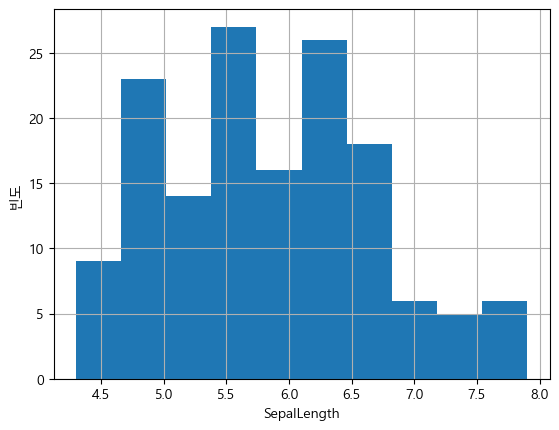

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글 처리를 위해 폰트 설정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
df["SepalLength"].hist()
plt.xlabel('SepalLength')
plt.ylabel('빈도')

Text(0, 0.5, '빈도')

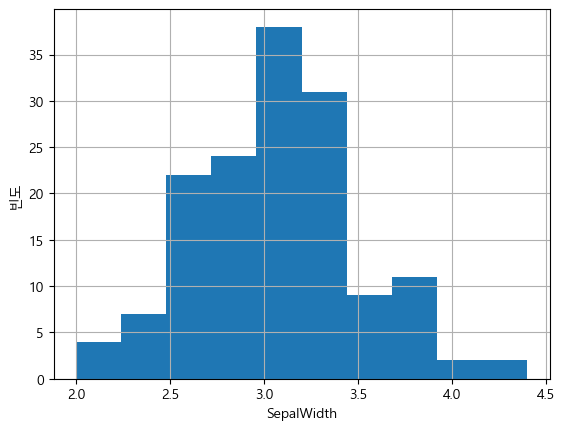

In [3]:
df["SepalWidth"].hist()
plt.xlabel('SepalWidth')
plt.ylabel('빈도')

Text(0, 0.5, '빈도')

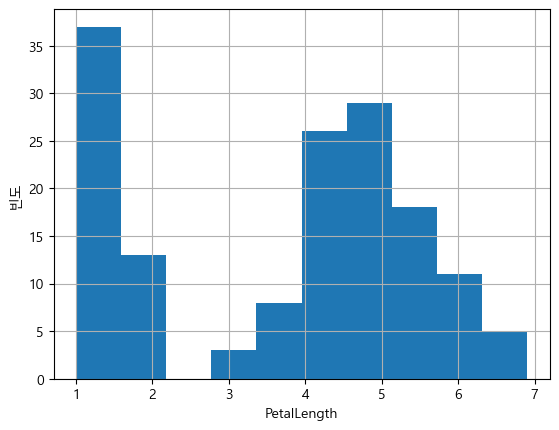

In [4]:
df["PetalLength"].hist()
plt.xlabel('PetalLength')
plt.ylabel('빈도')

Text(0, 0.5, '빈도')

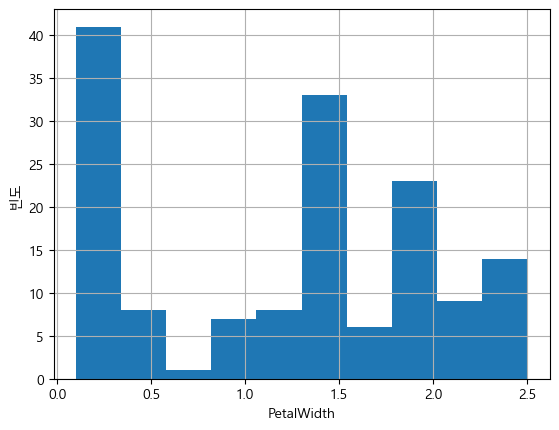

In [5]:
df["PetalWidth"].hist()
plt.xlabel('PetalWidth')
plt.ylabel('빈도')

Text(0, 0.5, '빈도')

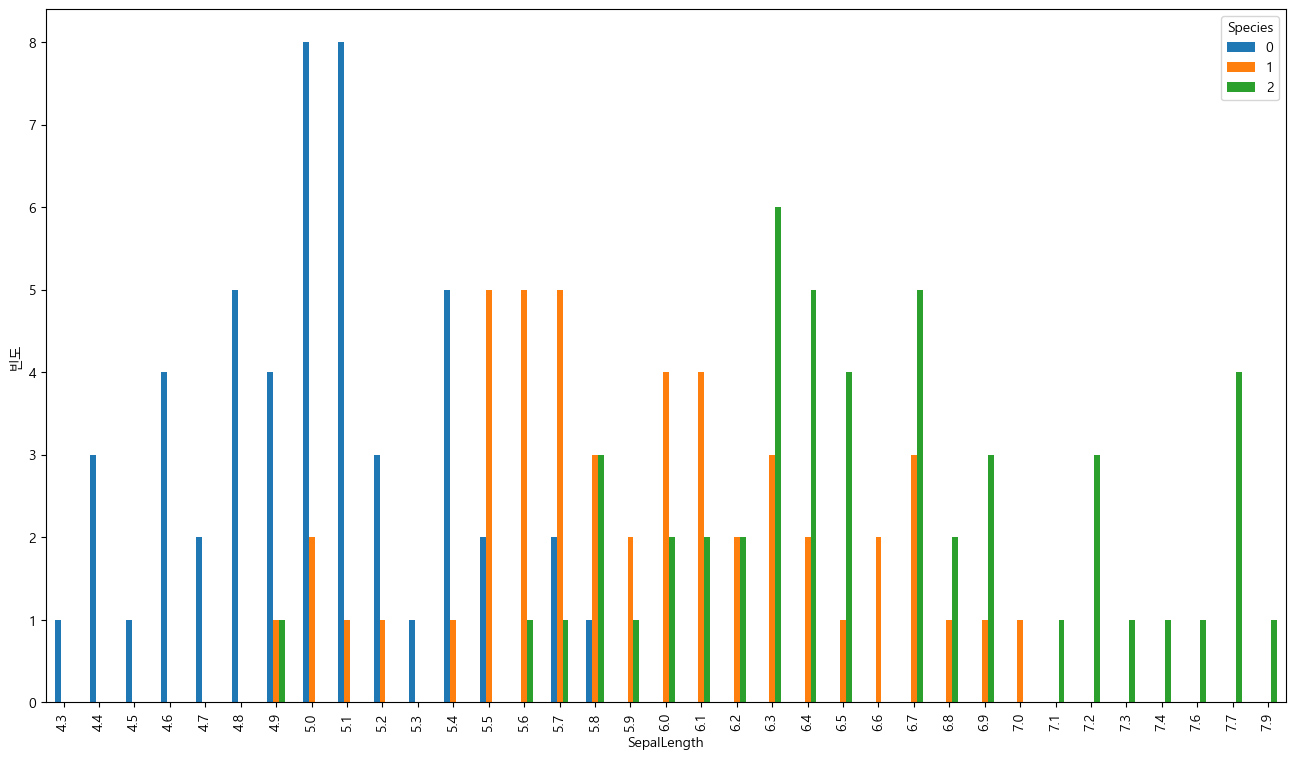

In [6]:
plt.rcParams["figure.figsize"]=(16,9)
pd.crosstab(df["SepalLength"],df.Species).plot(kind='bar')
plt.xlabel('SepalLength')
plt.ylabel('빈도')

Text(0, 0.5, '빈도')

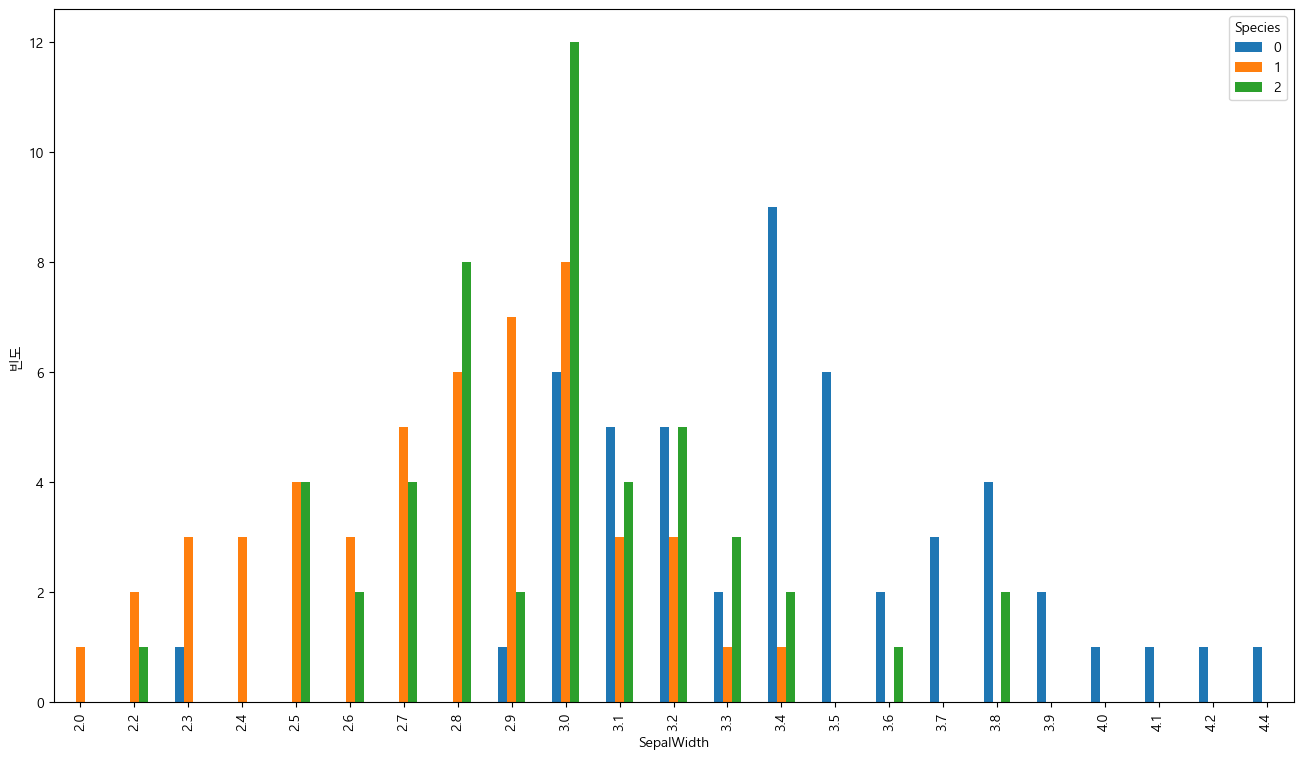

In [7]:
plt.rcParams["figure.figsize"]=(16,9)
pd.crosstab(df["SepalWidth"],df.Species).plot(kind='bar')
plt.xlabel('SepalWidth')
plt.ylabel('빈도')

Text(0, 0.5, '빈도')

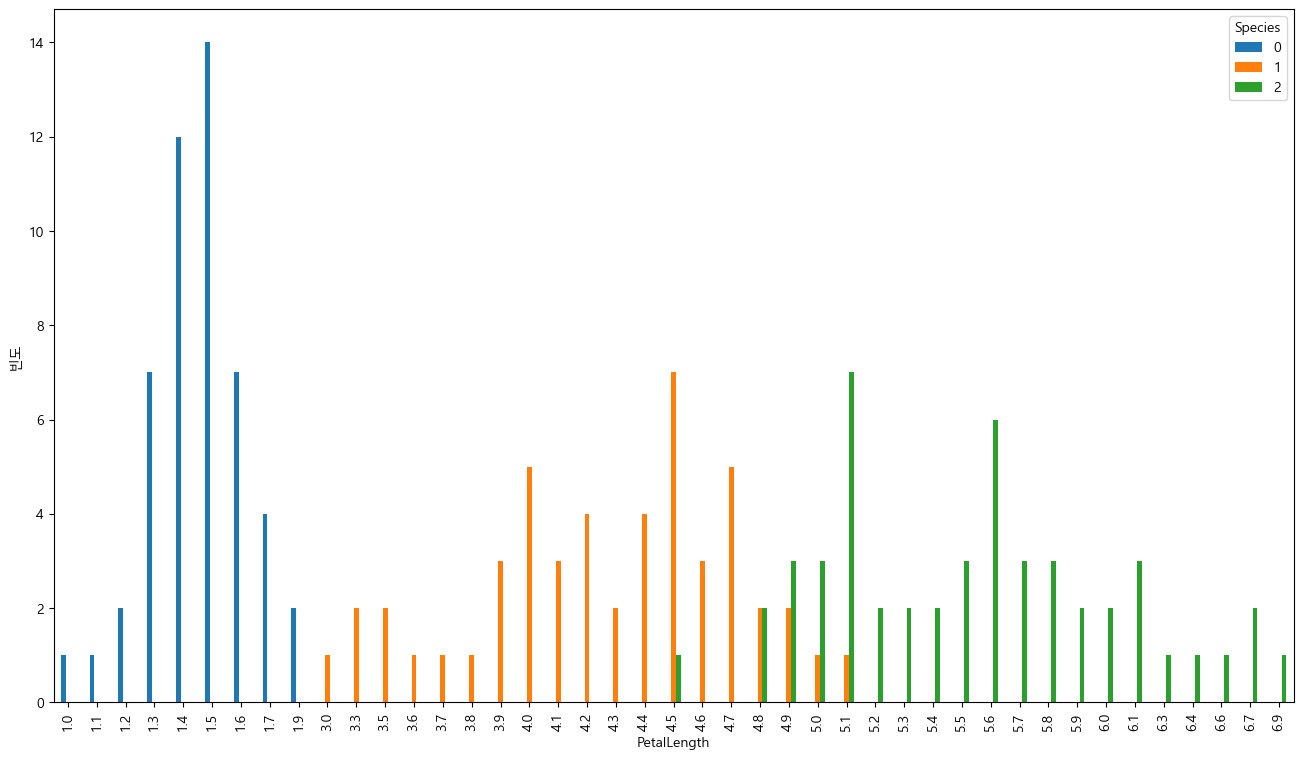

In [8]:
plt.rcParams["figure.figsize"]=(16,9)
pd.crosstab(df["PetalLength"],df.Species).plot(kind='bar')
plt.xlabel('PetalLength')
plt.ylabel('빈도')

Text(0, 0.5, '빈도')

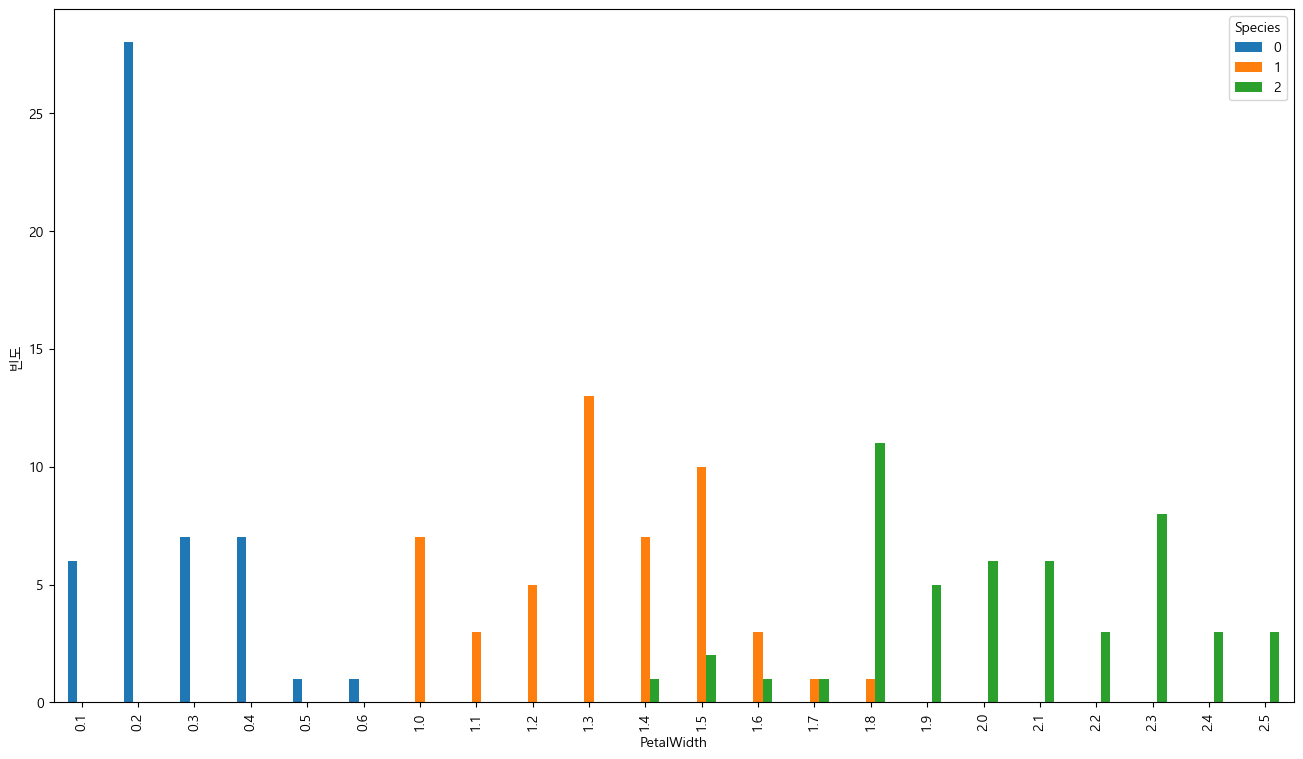

In [9]:
plt.rcParams["figure.figsize"]=(16,9)
pd.crosstab(df["PetalWidth"],df.Species).plot(kind='bar')
plt.xlabel('PetalWidth')
plt.ylabel('빈도')

c:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (0: setosa, 1: versicolor, 2: virginica )')

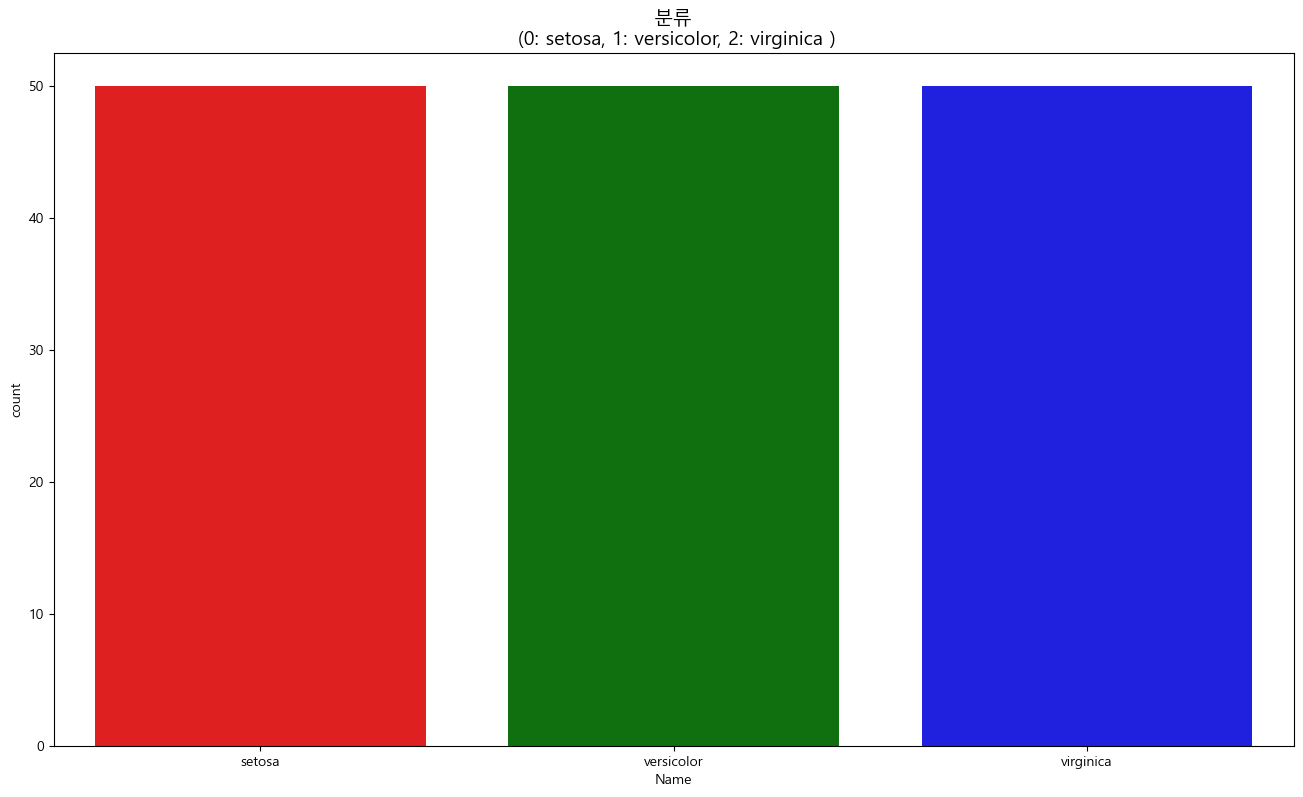

In [10]:
import seaborn as sns

colors = ["red", "green", "blue"]
sns.countplot('Name', data=df, palette=colors)
plt.title('분류\n (0: setosa, 1: versicolor, 2: virginica )', fontsize=14)

In [11]:
cols = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
X = df[cols]
y = df['Species']

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [13]:
# 트리 모델 생성
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)
print("학습용:", model.score(X_train, y_train))
print("검증용:", model.score(X_test, y_test))

학습용: 1.0
검증용: 0.9666666666666667


In [14]:
# confusion matrix(혼동행렬, 오분류표) 출력
from sklearn.metrics import confusion_matrix

pred = model.predict(X_test)
cm = confusion_matrix(y_test, pred)
cm

array([[10,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  7]], dtype=int64)

In [15]:
df_cm=pd.DataFrame(cm, index=[0, 1, 2], columns=[0, 1, 2])
df_cm

,0,1,2
0,10,0,0
1,0,12,1
2,0,0,7


<AxesSubplot:title={'center':'Confusion Matrix'}>

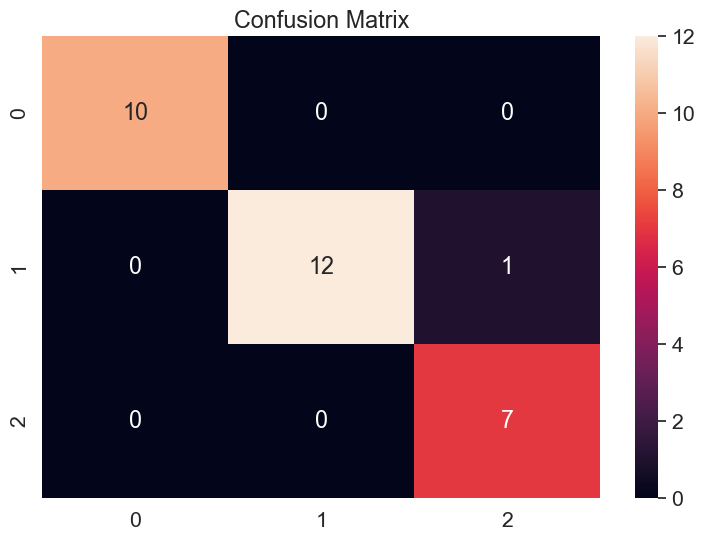

In [16]:
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline
sns.set(font_scale=1.4)
plt.figure(figsize=(9,6))
plt.title("Confusion Matrix")
sns.heatmap(df_cm, annot=True)
# 색상이 밝으면 높은 숫자, 색상이 어두우면 낮은 숫자

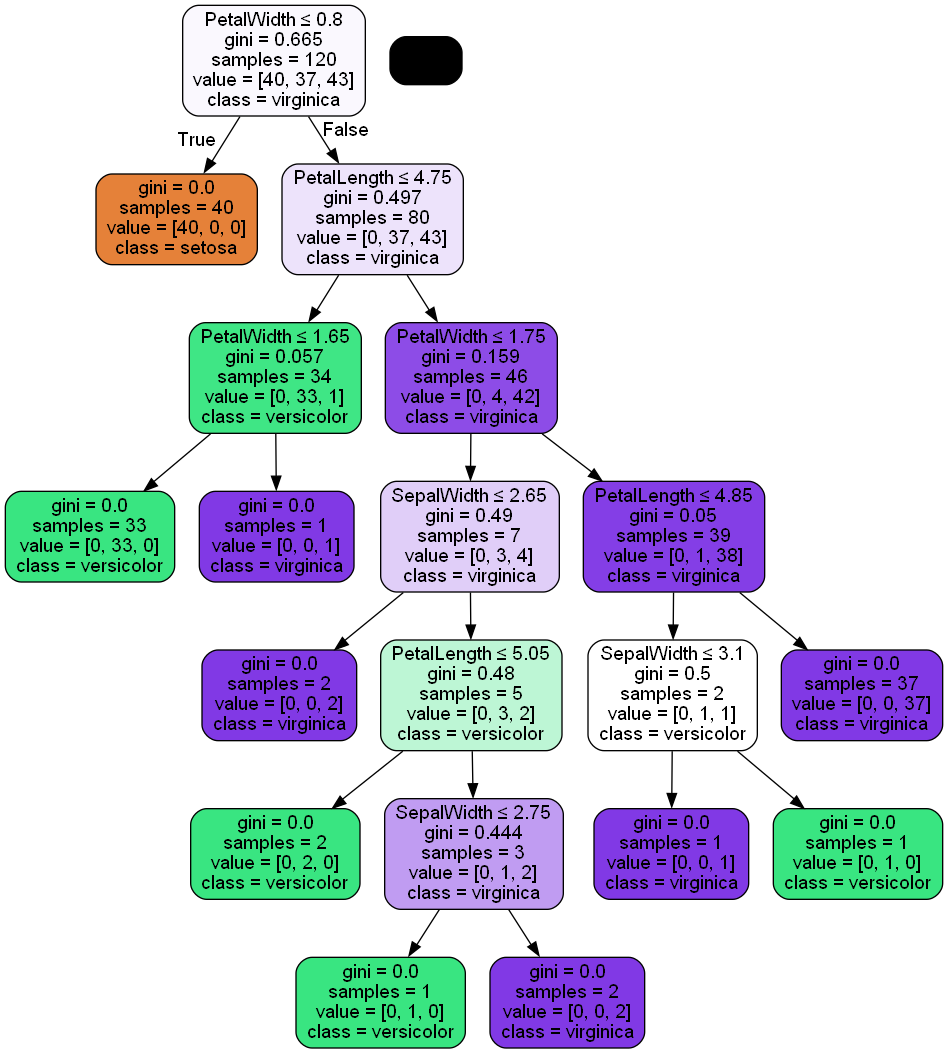

In [17]:
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
from IPython.display import Image

dot_data = export_graphviz(model, out_file=None, feature_names=cols, class_names=["setosa", "versicolor", "virginica"], 
                            filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [18]:
#트리를 만드는 결정에 각 특성이 얼마나 중요한지를 평가하는 특성 중요도 적용
#0~1 사이의 값(0 전혀 사용되지 않음 ~ 1 완벽하게 타겟 클래스 예측)
import numpy as np
from matplotlib import font_manager, rc

# 한글 처리를 위해 폰트 설정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

def plot_tree(model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cols)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)

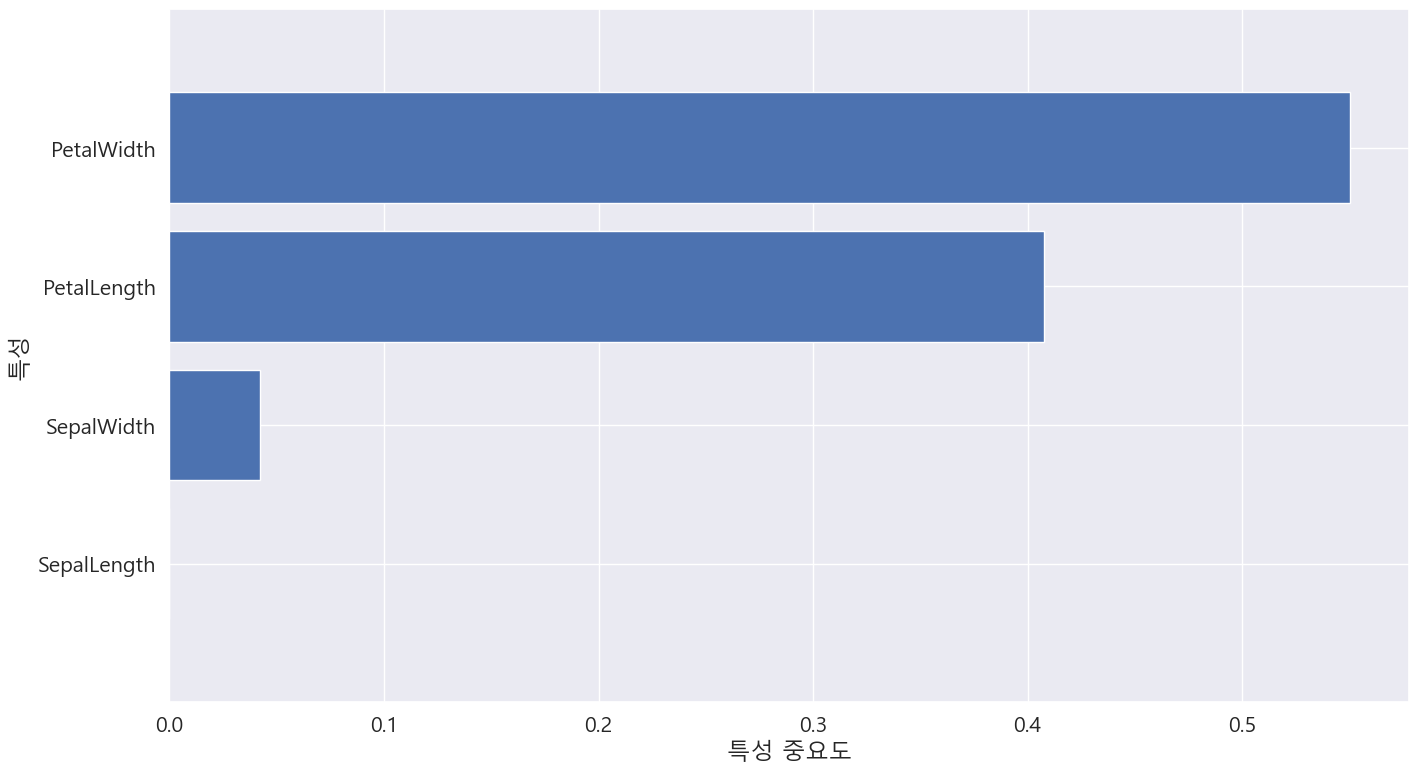

In [19]:
plot_tree(model)

In [20]:
# 랜덤포레스트 : 여러 개의 의사결정나무를 만들고 투표를 통해 다수결로 결과를 결정함
# 처리가 빠르고 분류 정밀도가 높다.
from sklearn.ensemble import RandomForestClassifier

# 100개의 트리로 구성된 랜덤 포레스트
forest = RandomForestClassifier(n_estimators=100, random_state=10)
forest.fit(X_train, y_train)
print("학습용:", forest.score(X_train, y_train))
print("검증용:", forest.score(X_test, y_test))

학습용: 1.0
검증용: 1.0


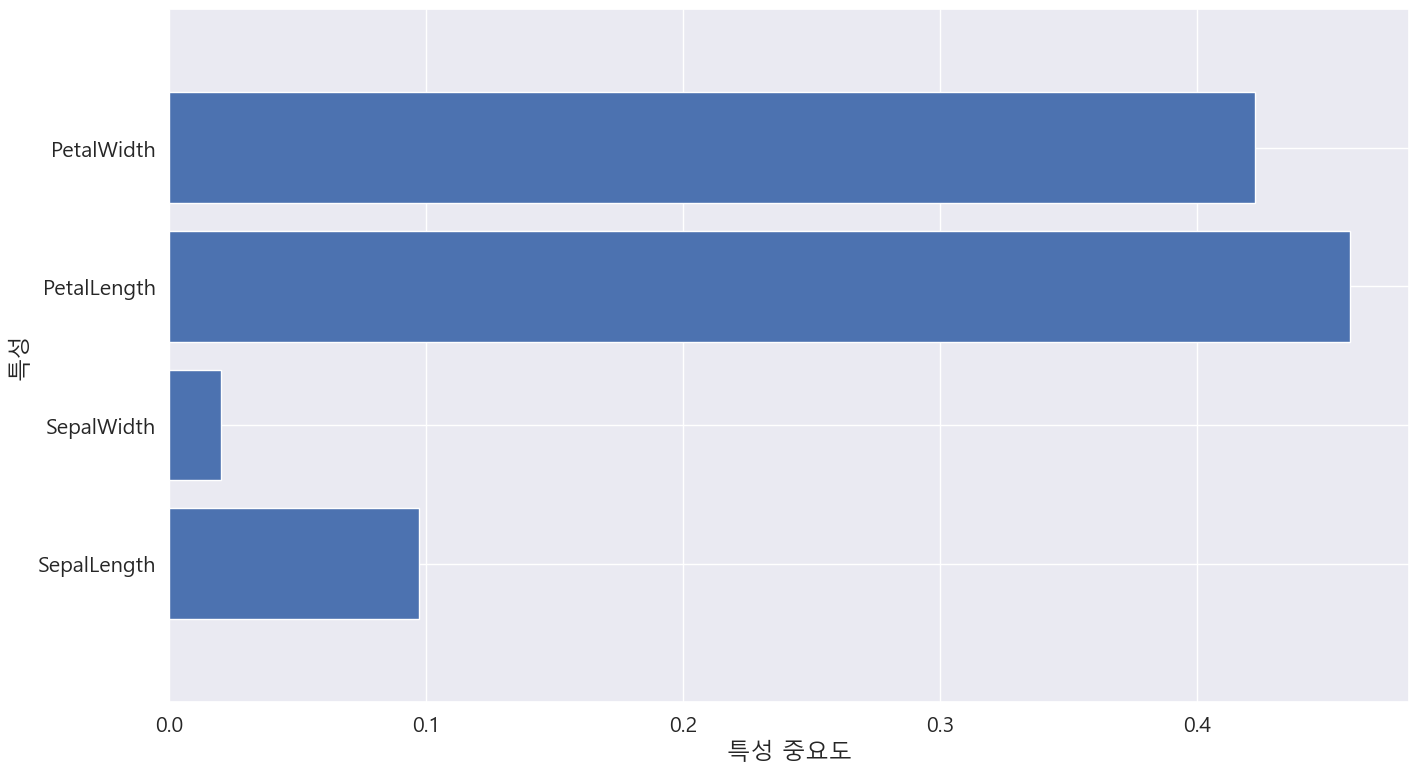

In [21]:
# 랜덤 포레스트에서 제공하는 각 트리의 특성 중요도
# 랜덤 포레스트는 좀 더 폭넓은 시각으로 데이터를 관찰할 수 있다
plot_tree(forest)